In [13]:
#pip install pandas-datareader
from datetime import datetime
import pandas_datareader.data as wb
import pandas as pd
import math
import matplotlib.pyplot as plt 
import numpy as np
# Machine Learning Library
from fbprophet import Prophet
import lightgbm as lgb

from sklearn.model_selection import train_test_split

In [2]:
start = datetime(2018,5,1)
end = datetime(2019,5,1)
y_start = datetime(2019,5,2)
y_end = datetime(2019,5,27)
y_samsung = wb.DataReader('005930.KS', 'yahoo',y_start,y_end)# 삼성전지
#삼성전자 005930
#카카오- 035720
#두산- 000150
#기아차- 000270
#sk하이닉스- 000660
#현대차-005380
#한화-000880
#cj-  001040
#대한항공- 003490
#LG-003550
#농심-004370
#posco- 005490
#삼성전자- 005930
#에스오일- 010950




samsung = wb.DataReader('005930.KS', 'yahoo',start,end)# 삼성전지
samsung.head()
# open 시가
# high 고가
# low 저가
# close 종가
# volume 거래량
# Adj Close 주식의 분할, 배당, 배분 등을 고려해 조정한 종가



# open 한달 예측
#imputation-> median





,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-05-02,53000.0,53000.0,53000.0,53000.0,0.0,51733.824219
2018-05-03,53000.0,53000.0,53000.0,53000.0,0.0,51733.824219
2018-05-04,53900.0,51800.0,53000.0,51900.0,39565391.0,50660.105469
2018-05-08,53200.0,51900.0,52600.0,52600.0,23104720.0,51343.382812
2018-05-09,52800.0,50900.0,52600.0,50900.0,16128305.0,49683.992188


In [ ]:
#y.columns=['y']
#y=y.reset_index()
#y.columns=['ds','y']
#y

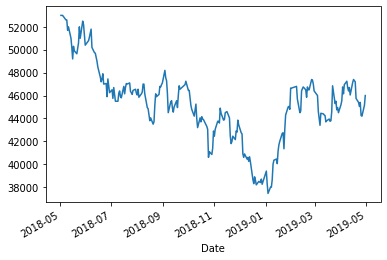

In [3]:
samsung['Open'].plot()

In [10]:
from scipy.stats import boxcox
from scipy.special import inv_boxcox

y =samsung['Open']
y,fitted_lambda= boxcox(y,lmbda=None)
a=inv_boxcox(y,fitted_lambda)
a

array([53000., 53000., 53000., 52600., 52600., 51700., 52000., 51000.,
       50200., 49200., 50300., 49900., 49650., 50600., 52000., 51000.,
       52500., 52200., 51300., 50400., 50500., 50800., 51100., 51800.,
       50200., 49750., 49700., 49000., 48500., 47600., 47200., 47450.,
       47900., 47000., 47050., 45900., 47450., 46850., 46250., 46500.,
       45750., 46700., 46100., 45500., 45500., 46200., 46400., 45900.,
       45800., 46800., 46150., 46700., 47050., 47000., 47100., 46350.,
       46250., 46100., 46450., 46550., 46200., 46050., 46550., 45850.,
       46150., 46300., 47000., 47000., 46150., 44950., 44850., 43800.,
       44050., 43500., 43700., 45150., 46150., 45900., 46100., 46800.,
       46750., 46950., 47100., 48200., 47550., 47300., 46200., 44500.,
       45450., 45550., 44900., 44550., 45000., 45550., 44950., 46000.,
       46850., 46550., 46950., 47250., 46450., 46450., 45150., 44800.,
       44200., 45250., 44000., 43200., 44050., 43700., 44150., 43950.,
      

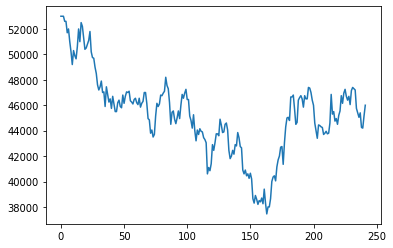

In [11]:
plt.plot(a.T )
plt.show()

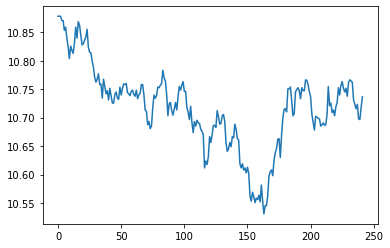

In [19]:
a1=[]
for i in range(len(a)):
    a1.append(math.log(a[i]))
plt.plot(a1)
plt.show()
# boc-cox, log 둘다 잘안됨

In [20]:
y

array([320220.70951546, 320220.70951546, 320220.70951546, 317369.38312815,
       317369.38312815, 310968.24558034, 313099.73935155, 306003.46164382,
       300344.48372536, 293293.66016672, 301050.97078359, 298226.5490818 ,
       296463.35891722, 303171.95269234, 313099.73935155, 306003.46164382,
       316657.16208989, 314521.97041753, 308129.72895351, 301757.71157231,
       302464.70567892, 304587.20380262, 306711.96707634, 311678.49594025,
       300344.48372536, 297168.44301572, 296815.86893678, 291886.58224913,
       288373.43166453, 282066.26775861, 279269.96629213, 281017.15538613,
       284166.28285016, 277873.41754938, 278222.45429178, 270211.67989091,
       281017.15538613, 276826.70991287, 272645.94651862, 274386.74808566,
       269169.44715094, 275780.60739474, 271602.28048901, 267433.76454766,
       267433.76454766, 272297.98981255, 273690.22409145, 270211.67989091,
       269516.78958894, 276477.94175969, 271950.10111588, 275780.60739474,
       278222.45429178, 2

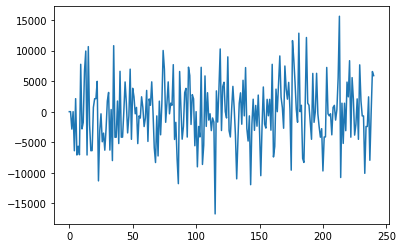

In [22]:
b=[]
for i in range(len(y)-1):
    b.append(y[i+1]-y[i])
plt.plot(b)
plt.show()

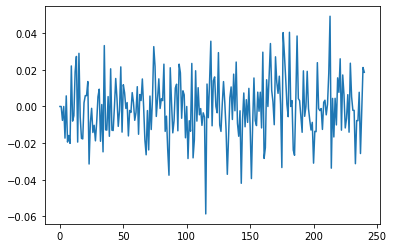

In [25]:
a2=[]
for i in range(len(a1)-1):
    a2.append(a1[i+1]-a1[i])
plt.plot(a2)
plt.show()

In [67]:
samsung.describe()

,High,Low,Open,Close,Volume,Adj Close
count,242.000000,242.000000,242.000000,242.000000,2.420000e+02,242.000000
mean,45673.966942,44753.512397,45233.884298,45216.528926,1.154865e+07,44741.813646
std,3183.897499,3126.084552,3222.742157,3134.163831,5.547245e+06,2898.608974
min,37600.000000,36850.000000,37450.000000,37450.000000,0.000000e+00,37450.000000
25%,44162.500000,43350.000000,43712.500000,43800.000000,8.316576e+06,43373.879883
50%,46050.000000,44950.000000,45500.000000,45500.000000,1.062559e+07,45087.507812
75%,47150.000000,46287.500000,46800.000000,46787.500000,1.327054e+07,46200.000000
max,53900.000000,53000.000000,53000.000000,53000.000000,6.349111e+07,51733.824219


In [104]:
ds=pd.date_range('20180502', periods=242)
ds = pd.DataFrame({'ds':ds})

In [114]:
y=samsung['Open']# prophet에 넣기 위해 변경

y.columns=['y']
y=y.reset_index()
y

,Date,Open
0,2018-05-02,53000.0
1,2018-05-03,53000.0
2,2018-05-04,53000.0
3,2018-05-08,52600.0
4,2018-05-09,52600.0
...,...,...
237,2019-04-24,45400.0
238,2019-04-25,44250.0
239,2019-04-26,44200.0
240,2019-04-29,45150.0


In [115]:
y

,Date,Open
0,2018-05-02,53000.0
1,2018-05-03,53000.0
2,2018-05-04,53000.0
3,2018-05-08,52600.0
4,2018-05-09,52600.0
...,...,...
237,2019-04-24,45400.0
238,2019-04-25,44250.0
239,2019-04-26,44200.0
240,2019-04-29,45150.0


In [116]:
y.columns=['ds','y']
y

,ds,y
0,2018-05-02,53000.0
1,2018-05-03,53000.0
2,2018-05-04,53000.0
3,2018-05-08,52600.0
4,2018-05-09,52600.0
...,...,...
237,2019-04-24,45400.0
238,2019-04-25,44250.0
239,2019-04-26,44200.0
240,2019-04-29,45150.0


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


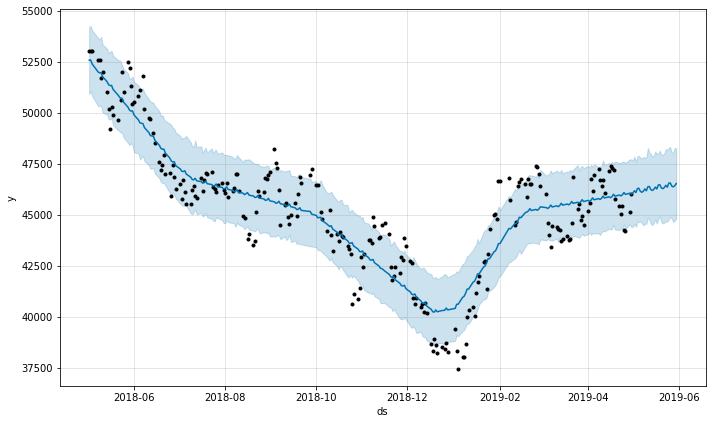

In [117]:
m_1 = Prophet()
m_1.fit(y)
future_1 = m_1.make_future_dataframe(periods=30)
forecast_1 = m_1.predict(future_1)
fig_1 = m_1.plot(forecast_1)


In [136]:
a=forecast_1['yhat'][0:17]

In [137]:
b=y_samsung['Open']

In [139]:
len(a)

17

In [140]:
c=0
for i in range(len(a)):
    c+=(a[i]-b[i])**2
import math
rmse=math.sqrt(c/17)
rmse
#rmse=math.sqrt((1/len(y_samsung['Open'])*sum((y_samsung['Open']- forecast_1['yhat'][0:16])**2   ))) 



#-> 정규화해서 넣어보기 rmse 가 스케일에 따라 잘라질수 도 있을것 같음

8226.002126276966

In [42]:
kakao = wb.DataReader('035720.KS', 'yahoo',start,end)#카카오- 035720
kakao.tail(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-02-28,176500.0,170500.0,174500.0,172000.0,1022917.0,172000.0
2020-03-02,176500.0,169500.0,174500.0,175000.0,793495.0,175000.0
2020-03-03,181000.0,175000.0,180500.0,175000.0,629017.0,175000.0
2020-03-04,181000.0,174000.0,174000.0,179500.0,709188.0,179500.0
2020-03-05,183000.0,176500.0,182500.0,179500.0,821744.0,179500.0
2020-03-06,178500.0,174000.0,176500.0,175500.0,568424.0,175500.0
2020-03-09,175500.0,175500.0,175500.0,175500.0,0.0,175500.0
2020-03-10,174500.0,164000.0,164500.0,173000.0,950875.0,173000.0
2020-03-11,174500.0,167000.0,172000.0,169000.0,550227.0,169000.0


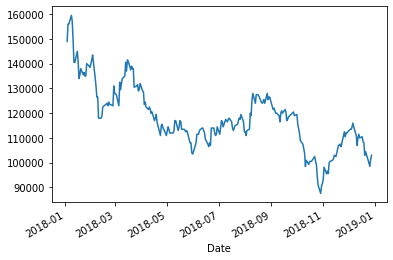

In [23]:
kakao['Close'].plot()

In [41]:
dusan = wb.DataReader('000150.KS', 'yahoo',start,end)#두산- 000150
dusan.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-05-02,117107.0,113259.0,113808.0,115458.0,45743.0,115458.0
2019-05-03,116008.0,113808.0,115458.0,114358.0,23306.0,114358.0
2019-05-07,113808.0,110510.0,113259.0,111609.0,44585.0,111609.0
2019-05-08,113259.0,110510.0,111059.0,112159.0,28803.0,112159.0
2019-05-09,113259.0,109520.0,112159.0,109520.0,46179.0,109520.0
2019-05-10,113259.0,108420.0,110510.0,111609.0,53582.0,111609.0
2019-05-13,112709.0,109960.0,111059.0,111059.0,39257.0,111059.0
2019-05-14,111609.0,109960.0,111059.0,110510.0,42995.0,110510.0
2019-05-15,113259.0,109630.0,110510.0,112709.0,28630.0,112709.0


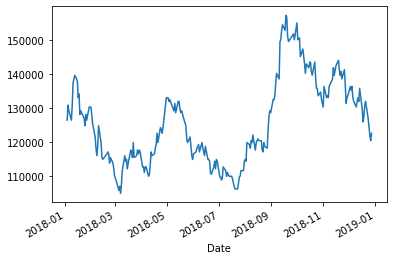

In [24]:
dusan['Close'].plot()

In [12]:
kia = wb.DataReader('000270.KS', 'yahoo',start,end)#기아차- 000270
kia.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-03,32900.0,32450.0,32450.0,32600.0,787854.0,32600.0
2018-01-04,32650.0,31550.0,32500.0,31550.0,1657605.0,31550.0
2018-01-05,32050.0,31400.0,31550.0,31950.0,802986.0,31950.0
2018-01-08,32400.0,31850.0,31900.0,32400.0,807776.0,32400.0
2018-01-09,32650.0,32200.0,32200.0,32500.0,695703.0,32500.0


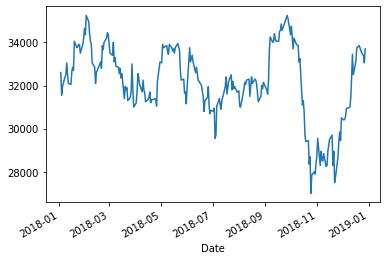

In [25]:
kia['Close'].plot()

In [13]:
sk= wb.DataReader('000660.KS', 'yahoo',start,end)#sk하이닉스- 000660
sk.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-03,78800.0,77300.0,78100.0,77700.0,3097644.0,75760.734375
2018-01-04,79700.0,77100.0,78700.0,77100.0,3729328.0,75175.710938
2018-01-05,79400.0,78300.0,78400.0,79300.0,3395065.0,77320.804688
2018-01-08,80000.0,77400.0,79500.0,78200.0,2960495.0,76248.257812
2018-01-09,78900.0,76300.0,78300.0,76900.0,3343874.0,74980.703125


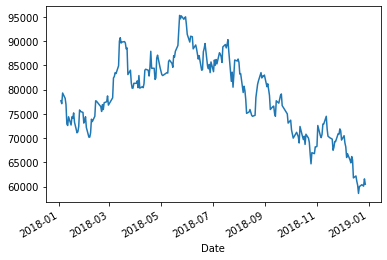

In [26]:
sk['Close'].plot()

In [14]:
hyundai= wb.DataReader('005380.KS', 'yahoo',start,end)#현대차-005380
hyundai.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-03,151000.0,149000.0,149000.0,150500.0,450874.0,145586.625000
2018-01-04,151000.0,146000.0,150500.0,146500.0,931558.0,141717.203125
2018-01-05,149000.0,145500.0,146000.0,149000.0,463695.0,144135.593750
2018-01-08,151000.0,147500.0,148500.0,151000.0,482619.0,146070.296875
2018-01-09,152500.0,149500.0,151000.0,152500.0,465845.0,147521.328125


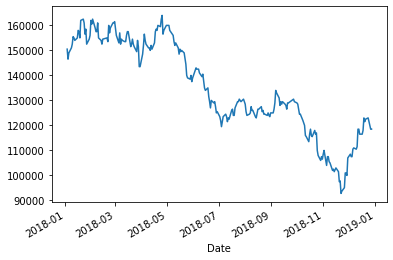

In [27]:
hyundai['Close'].plot()

In [15]:
hanhwa= wb.DataReader('000880.KS', 'yahoo',start,end)#한화-000880
hanhwa.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-03,43650.0,42850.0,42900.0,43000.0,227775.0,43000.0
2018-01-04,44450.0,43150.0,43500.0,43600.0,328903.0,43600.0
2018-01-05,47000.0,44800.0,45000.0,46400.0,1016729.0,46400.0
2018-01-08,46550.0,45600.0,46350.0,45700.0,279136.0,45700.0
2018-01-09,47400.0,45800.0,45800.0,45850.0,414873.0,45850.0


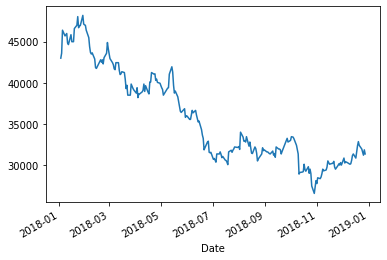

In [28]:
hanhwa['Close'].plot()

In [16]:
cj= wb.DataReader('001040.KS', 'yahoo',start,end)#cj-  001040
cj.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-03,155217.0,152609.0,153478.0,154783.0,97612.0,154783.0
2018-01-04,155217.0,152174.0,155217.0,153043.0,81911.0,153043.0
2018-01-05,153913.0,150870.0,153478.0,151739.0,90737.0,151739.0
2018-01-08,152609.0,149565.0,152174.0,150870.0,78424.0,150870.0
2018-01-09,157826.0,150870.0,150870.0,156522.0,123612.0,156522.0


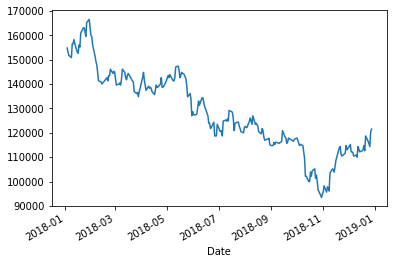

In [29]:
cj['Close'].plot()

In [17]:
daehan= wb.DataReader('001040.KS', 'yahoo',start,end)#대한항공- 003490
daehan.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-03,155217.0,152609.0,153478.0,154783.0,97612.0,154783.0
2018-01-04,155217.0,152174.0,155217.0,153043.0,81911.0,153043.0
2018-01-05,153913.0,150870.0,153478.0,151739.0,90737.0,151739.0
2018-01-08,152609.0,149565.0,152174.0,150870.0,78424.0,150870.0
2018-01-09,157826.0,150870.0,150870.0,156522.0,123612.0,156522.0


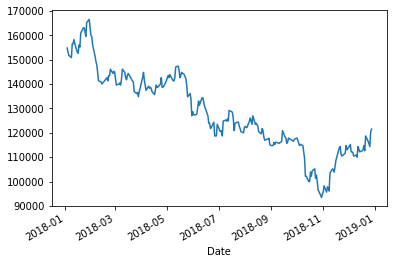

In [30]:
daehan['Close'].plot()

In [18]:
lg= wb.DataReader('003550.KS', 'yahoo',start,end)#LG-003550
lg.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-03,91000.0,89600.0,90000.0,90000.0,238461.0,90000.0
2018-01-04,90800.0,88500.0,90200.0,89100.0,261247.0,89100.0
2018-01-05,89200.0,87800.0,89200.0,88800.0,260522.0,88800.0
2018-01-08,90500.0,88800.0,89200.0,89600.0,231615.0,89600.0
2018-01-09,94800.0,89600.0,89800.0,93600.0,419749.0,93600.0


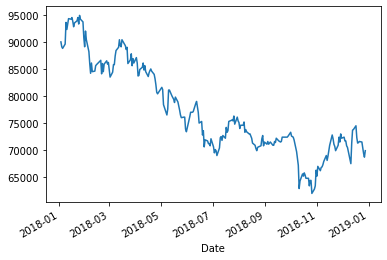

In [31]:
lg['Close'].plot()

In [19]:
nongsim= wb.DataReader('003550.KS', 'yahoo',start,end)#농심-004370
nongsim.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-03,91000.0,89600.0,90000.0,90000.0,238461.0,90000.0
2018-01-04,90800.0,88500.0,90200.0,89100.0,261247.0,89100.0
2018-01-05,89200.0,87800.0,89200.0,88800.0,260522.0,88800.0
2018-01-08,90500.0,88800.0,89200.0,89600.0,231615.0,89600.0
2018-01-09,94800.0,89600.0,89800.0,93600.0,419749.0,93600.0


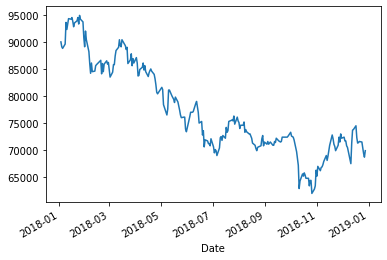

In [32]:
nongsim['Close'].plot()

In [20]:
posco= wb.DataReader('005490.KS', 'yahoo',start,end)#posco- 005490
posco.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-03,358500.0,346500.0,347000.0,357500.0,485812.0,344761.87500
2018-01-04,370000.0,361000.0,362000.0,367500.0,416948.0,354405.56250
2018-01-05,369500.0,365500.0,369000.0,368000.0,205202.0,354887.75000
2018-01-08,374000.0,363500.0,370000.0,369500.0,206165.0,356334.28125
2018-01-09,377500.0,371500.0,372500.0,377500.0,229700.0,364049.25000


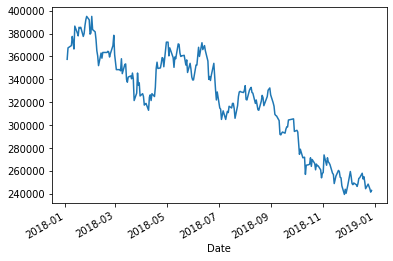

In [33]:
posco['Close'].plot()

In [21]:
soil= wb.DataReader('010950.KS', 'yahoo',start,end)#에스오일- 010950
soil.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-03,117000.0,112000.0,116500.0,113500.0,468519.0,112897.343750
2018-01-04,115000.0,112000.0,114000.0,113500.0,328862.0,112897.343750
2018-01-05,115000.0,112000.0,113500.0,113000.0,313688.0,112400.000000
2018-01-08,114000.0,110500.0,113500.0,111500.0,386891.0,110907.960938
2018-01-09,114000.0,111000.0,111500.0,114000.0,350083.0,113394.687500


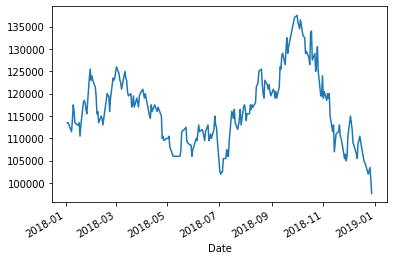

In [34]:
soil['Close'].plot()